# Salary Project

Problem Statement:

Predict the salary if the employee using the features provided in the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Salaries.csv")
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
pd.set_option('display.max_rows',None)
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


## Checking Null values in the DataFrame

In [4]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

### DataFrame Discription:

The dataset contains the data of employee. On the basis of the data we have to predict the salary if the employee using the features provided in the data.
Dataset contains the data like 'rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', and 'salary'.

In the above dataset the target is to predict the "Salary"

### Checking the datatype of the columns.

In [6]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

We can observe that the "Salary" is an integer type.

In [7]:
data["salary"]=data["salary"].astype(float)
data["yrs.service"]=data["yrs.service"].astype(float)

In [8]:
data.dtypes

rank              object
discipline        object
yrs.since.phd      int64
yrs.service      float64
sex               object
salary           float64
dtype: object

In [9]:
data=data.drop(["discipline"],axis=1)
data=data.drop(["sex"],axis=1)

In [10]:
data

,rank,yrs.since.phd,yrs.service,salary
0,Prof,19,18.0,139750.0
1,Prof,20,16.0,173200.0
2,AsstProf,4,3.0,79750.0
3,Prof,45,39.0,115000.0
4,Prof,40,41.0,141500.0
5,AssocProf,6,6.0,97000.0
6,Prof,30,23.0,175000.0
7,Prof,45,45.0,147765.0
8,Prof,21,20.0,119250.0
9,Prof,18,18.0,129000.0


In [21]:
X = data.iloc[:, 2:-1]
y = data.iloc[:,-1]
X
y

0      139750.0
1      173200.0
2       79750.0
3      115000.0
4      141500.0
5       97000.0
6      175000.0
7      147765.0
8      119250.0
9      129000.0
10     119800.0
11      79800.0
12      77700.0
13      78000.0
14     104800.0
15     117150.0
16     101000.0
17     103450.0
18     124750.0
19     137000.0
20      89565.0
21     102580.0
22      93904.0
23     113068.0
24      74830.0
25     106294.0
26     134885.0
27      82379.0
28      77000.0
29     118223.0
30     132261.0
31      79916.0
32     117256.0
33      80225.0
34      80225.0
35      77000.0
36     155750.0
37      86373.0
38     125196.0
39     100938.0
40     146500.0
41      93418.0
42     101299.0
43     231545.0
44      94384.0
45     114778.0
46      98193.0
47     151768.0
48     140096.0
49      70768.0
50     126621.0
51     108875.0
52      74692.0
53     106639.0
54     103760.0
55      83900.0
56     117704.0
57      90215.0
58     100135.0
59      75044.0
60      90304.0
61      75243.0
62     1

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)
y_pred

array([107319.9708998 , 107319.9708998 , 118553.39449024, 102077.70655759,
       104324.39127568, 109566.65561789, 102077.70655759, 107319.9708998 ,
       102077.70655759, 112562.235242  , 114808.91996009, 108068.86580583,
       120051.1843023 , 103575.49636965, 108817.76071186, 116306.70977215,
       115557.81486612, 108817.76071186, 114808.91996009, 107319.9708998 ,
       121548.97411436, 101328.81165156, 104324.39127568, 103575.49636965,
       108068.86580583, 105822.18108774, 109566.65561789, 123795.65883244,
       114060.02505406, 120051.1843023 , 123795.65883244, 112562.235242  ,
       101328.81165156, 109566.65561789, 106571.07599377, 105073.28618171,
       120051.1843023 , 127540.13336259, 113311.13014803, 105073.28618171,
       118553.39449024, 113311.13014803, 128289.02826862, 118553.39449024,
       111813.34033598, 117804.49958421, 129786.81808068, 112562.235242  ,
       129037.92317465, 109566.65561789, 105822.18108774, 108817.76071186,
       116306.70977215, 1

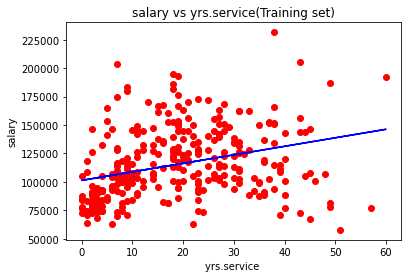

In [25]:
# Visualize training set results
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('salary vs yrs.service(Training set)')
plt.xlabel('yrs.service ')
plt.ylabel('salary')
plt.show()

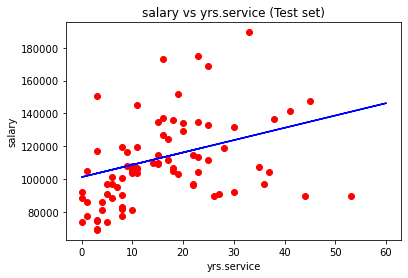

In [26]:
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('salary vs yrs.service (Test set)')
plt.xlabel('yrs.service')
plt.ylabel('salary')
plt.show()

In [27]:
# Make new prediction
new_salary_pred = regressor.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

The predicted salary of a person with 15 years experience is  [112562.235242]


In [34]:
new_salary_pred = regressor.predict(X)
new_salary_pred

array([114808.91996009, 113311.13014803, 103575.49636965, 130535.71298671,
       132033.50279877, 105822.18108774, 118553.39449024, 135029.08242288,
       116306.70977215, 114808.91996009, 107319.9708998 , 102826.60146362,
       102077.70655759, 101328.81165156, 114808.91996009, 103575.49636965,
       116306.70977215, 126791.23845656, 118553.39449024, 128289.02826862,
       120800.07920833, 124544.55373847, 123795.65883244, 115557.81486612,
       107319.9708998 , 107319.9708998 , 118553.39449024, 103575.49636965,
       101328.81165156, 107319.9708998 , 104324.39127568, 102826.60146362,
       108068.86580583, 102826.60146362, 102826.60146362, 101328.81165156,
       117055.60467818, 104324.39127568, 124544.55373847, 108068.86580583,
       102826.60146362, 118553.39449024, 121548.97411436, 129786.81808068,
       115557.81486612, 112562.235242  , 122297.86902039, 115557.81486612,
       120051.1843023 , 102077.70655759, 122297.86902039, 109566.65561789,
       103575.49636965, 1